In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://raw.githubusercontent.com/redashu/Datasets/master/PositionSalaries_Data.csv'
df = pd.read_csv(url)

In [9]:
x = range(1,15)
print(len(x)) 
y=[100,90,80,70,60,65,70,75,77,79,90,99,100,110]
print(len(y))

14
14


In [10]:

#                       Recommended

# As we know that y = mx + c is linear regression
# And y = m1x1 + m2x2 + m3x3 + c  which is multi linear regression
#______________________________________________________________________


# And y = c + m1x + m2x^2 + m3x^3 which is polynomial regression.


# In polynomial regression, the degree size should not exceed 4 otherwise overfitting occurs.

# The transformation of data which is not linear to be transformed in the form of linear regression
# is known as polynomial regression. It is not a direct algorithm.


In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
wf=df.copy()

In [11]:
wf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
features=wf.iloc[:,1:-1].values
labels=wf.iloc[:,-1].values
labels

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [12]:
poly_model=PolynomialFeatures(degree=4)
# .fit_transform will fit and transform the no.of 
# years which is the feature which is not to be predicted in the problem statement
transform_data=poly_model.fit_transform(features) 
print(transform_data)
#Now using the transformed data in the linear regression
model = LinearRegression()
train_model = model.fit(transform_data,labels)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [13]:
#now lets try predicting
predicted_output=train_model.predict(poly_model.fit_transform(features) )

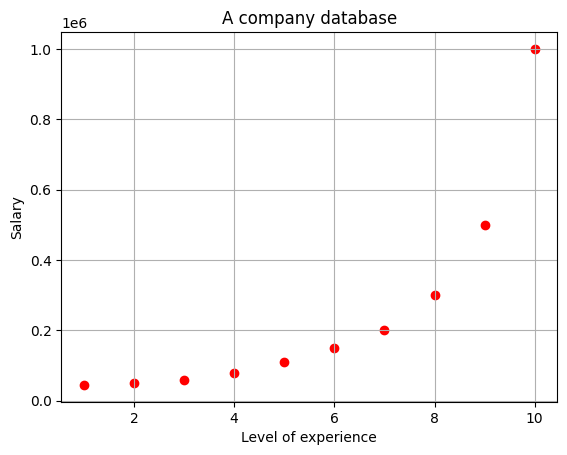

In [6]:
#lets plot this data as visual
plt.xlabel('Level of experience')
plt.ylabel('Salary')
plt.title('A company database')
plt.scatter(features,labels,color='red')
plt.grid()
plt.show()

In [7]:
#Implementing linear regression only
model=LinearRegression()
trained=model.fit(features,labels)

In [14]:
# actual salary
print(labels)
#predicted salary
print(predicted_output)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[ 53356.64335673  31759.90675989  58642.19114214  94632.86713283
 121724.94172492 143275.05827504 184003.49650348 289994.17249416
 528694.63869465 988916.08391617]


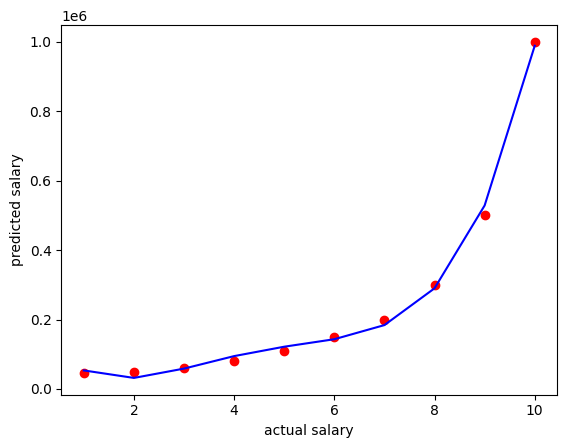

In [15]:
#lets plot actual and predicted data points
plt.xlabel('actual salary')
plt.ylabel('predicted salary')
plt.scatter(features,labels,color='red')
plt.plot(features,predicted_output,color='blue')
plt.show()